# Aplicação do algoritmo

In [118]:
import pandas as pd
from sklearn.metrics import r2_score
from timeseriesmetrics import theil

def computeAccuracyModels(model_name, city_name, y_pred, y_true):
    """
    Calcula as métricas Theil e R² para um modelo e localidade e atualiza o DataFrame consolidado.
    Adiciona apenas as colunas para o modelo especificado, sem recriar as linhas de localidades já existentes.
    """
    global df_metrics  # DataFrame consolidado de métricas

    # Garantir que y_pred e y_true são arrays numpy ou pandas
    y_pred = y_pred.values if isinstance(y_pred, pd.Series) else y_pred
    y_true = y_true.values if isinstance(y_true, pd.Series) else y_true

    # Cálculo das métricas
    r2 = r2_score(y_true, y_pred)
    theil_stat = theil(y_true, y_pred)

    # Nome das colunas dinâmicas para este modelo
    r2_col_name = f'R2_{model_name}'
    theil_col_name = f'Theil_{model_name}'

    # Se a localidade já existe no DataFrame, adiciona/atualiza as colunas para o modelo
    if city_name in df_metrics['Localidade'].values:
        df_metrics.loc[df_metrics['Localidade'] == city_name, r2_col_name] = r2
        df_metrics.loc[df_metrics['Localidade'] == city_name, theil_col_name] = theil_stat
    else:
        # Caso a localidade não exista, levanta um erro
        raise ValueError(f"Localidade '{city_name}' não encontrada no DataFrame. Adicione-a antes de usar a função.")


In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [120]:
dados_salvador = pd.read_csv("data/Salvador_week.csv")
dados_fortaleza = pd.read_csv("data/Fortaleza_week.csv")
dados_teresina = pd.read_csv("data/Teresina_week.csv")
dados_saoluis = pd.read_csv("data/SaoLuis_week.csv")
dados_joaopessoa = pd.read_csv("data/JoaoPessoa_week.csv")
dados_natal = pd.read_csv("data/Natal_week.csv")

In [121]:
#salvador
dados_salvador['Data da Coleta'] = pd.to_datetime(dados_salvador['Data da Coleta'])
dados_salvador = dados_salvador.set_index('Data da Coleta')
#fortaleza
dados_fortaleza['Data da Coleta'] = pd.to_datetime(dados_fortaleza['Data da Coleta'])
dados_fortaleza = dados_fortaleza.set_index('Data da Coleta')
# teresina
dados_teresina['Data da Coleta'] = pd.to_datetime(dados_teresina['Data da Coleta'])
dados_teresina = dados_teresina.set_index('Data da Coleta')
#sao luis
dados_saoluis['Data da Coleta'] = pd.to_datetime(dados_saoluis['Data da Coleta'])
dados_saoluis = dados_saoluis.set_index('Data da Coleta')
#joao pessoa
dados_joaopessoa['Data da Coleta'] = pd.to_datetime(dados_joaopessoa['Data da Coleta'])
dados_joaopessoa = dados_joaopessoa.set_index('Data da Coleta')
# Natal
dados_natal['Data da Coleta'] = pd.to_datetime(dados_natal['Data da Coleta'])
dados_natal = dados_natal.set_index('Data da Coleta')

## Pre-Processamento

In [122]:
from sklearn.pipeline import Pipeline
import pandas as pd

# Lista das séries temporais em um dicionário
dados_series = {
    "salvador": dados_salvador,
    "fortaleza": dados_fortaleza,
    "teresina": dados_teresina,
    "saoluis": dados_saoluis,
    "joaopessoa": dados_joaopessoa,
    "natal": dados_natal
}



# Dicionário para armazenar os resultados transformados
series_transformadas = {}

# Iterando sobre as séries temporais
for nome, dados in dados_series.items():

    y = dados['Valor de Venda']

    series_transformadas[nome] = {
        "y": y
    }


y_fortaleza = series_transformadas["fortaleza"]["y"]

y_salvador = series_transformadas["salvador"]["y"]

y_joaopessoa = series_transformadas["joaopessoa"]["y"]

y_saoluis = series_transformadas["saoluis"]["y"]

y_teresina = series_transformadas["teresina"]["y"]


y_natal = series_transformadas["natal"]["y"]



## Análise de Autocorrelação

## Modelagem

## Gradient Descendent Online in ridge regression

Calculando Random Walk para salvador
Calculando Random Walk para fortaleza
Calculando Random Walk para teresina
Calculando Random Walk para saoluis
Calculando Random Walk para joaopessoa
Calculando Random Walk para natal


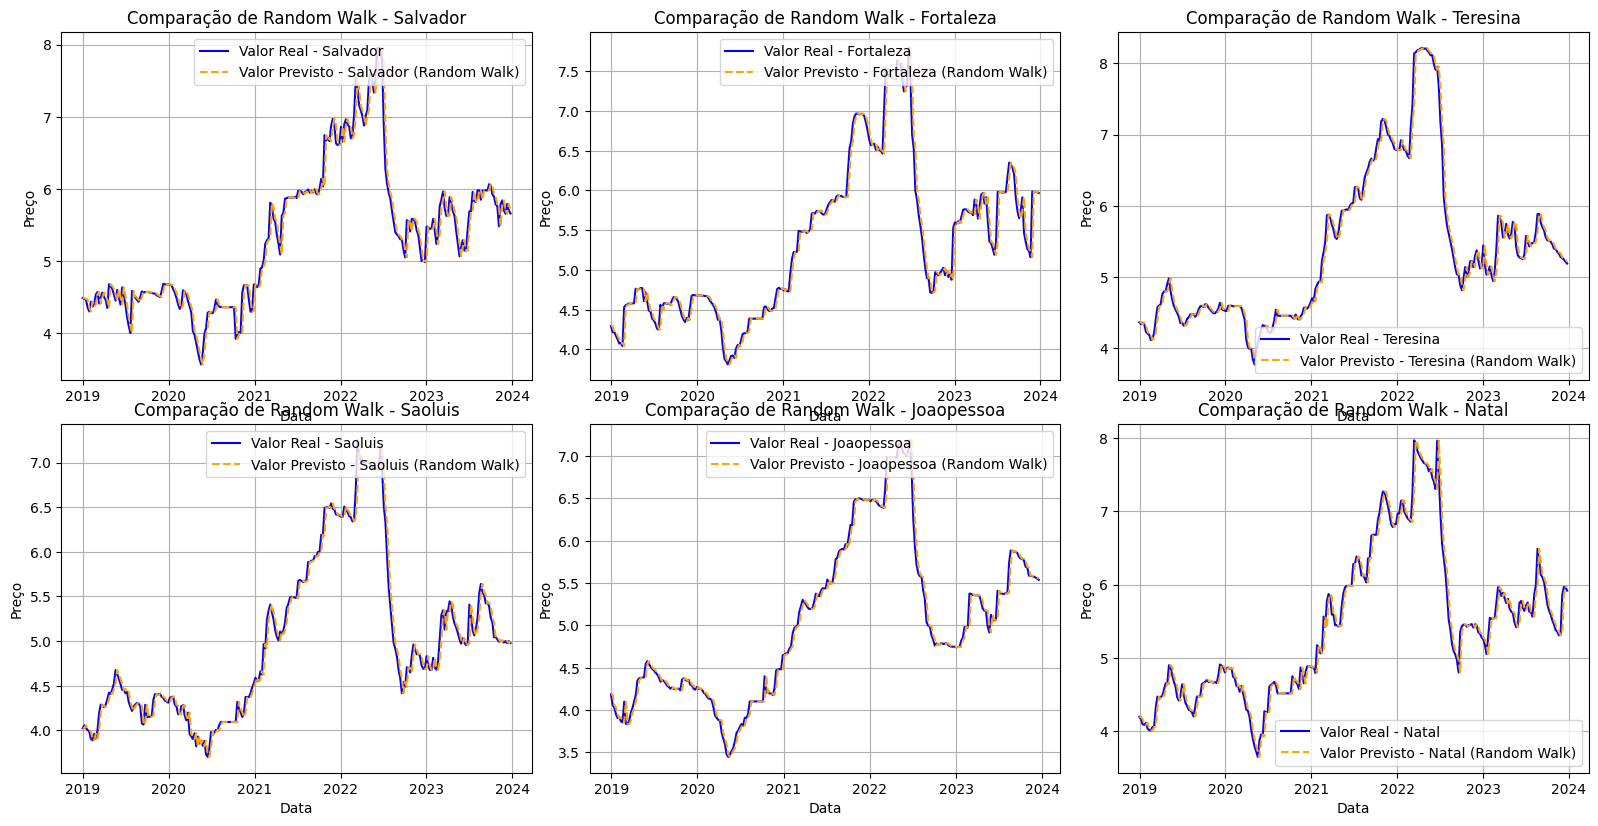

In [123]:
import matplotlib.pyplot as plt

# Função para aplicar Random Walk em múltiplas séries temporais
def random_walk_forecast_multiple(series_dict):
    forecast_results = {}
    
    for city_name, series in series_dict.items():
        print(f"Calculando Random Walk para {city_name}")
        
        # Previsão usando Random Walk
        y_forecast = series.shift(1)
        y_forecast.iloc[0] = series.iloc[0]  # Ajuste o primeiro valor para evitar NaN
        
        # Armazenar as previsões separadas para cada cidade
        forecast_results[city_name] = y_forecast
    
    return forecast_results


# Dicionário com as séries temporais de cada cidade
series_dict = {
    'salvador': dados_salvador['Valor de Venda'],
    'fortaleza': dados_fortaleza['Valor de Venda'],
    'teresina': dados_teresina['Valor de Venda'],
    'saoluis': dados_saoluis['Valor de Venda'],
    'joaopessoa': dados_joaopessoa['Valor de Venda'],
    'natal': dados_natal['Valor de Venda']
}

# Aplicar Random Walk em todas as séries
forecasts = random_walk_forecast_multiple(series_dict)

# Agora podemos acessar as previsões para cada cidade separadamente
y_forecast_salvador = forecasts['salvador']
y_forecast_fortaleza = forecasts['fortaleza']
y_forecast_teresina = forecasts['teresina']
y_forecast_saoluis = forecasts['saoluis']
y_forecast_joaopessoa = forecasts['joaopessoa']
y_forecast_natal = forecasts['natal']

# Número de cidades (para calcular a grade de subplots)
cities = list(series_dict.keys())
n_cities = len(cities)

# Definir número de colunas e linhas para os subgráficos (grade)
n_cols = 3  # 3 colunas
n_rows = (n_cities + 1) // n_cols  # Número de linhas baseado no número de cidades

# Criar subgráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))

# Ajustar o layout para garantir que os subgráficos não se sobreponham
plt.tight_layout()

# Plotar as previsões para todas as séries
for i, city_name in enumerate(cities):
    row = i // n_cols  # Determinar a linha do subplot
    col = i % n_cols  # Determinar a coluna do subplot
    
    ax = axes[row, col] if n_rows > 1 else axes[col]  # Selecionar o eixo correto
    
    # Plotar valores reais e previstos para a cidade
    ax.plot(series_dict[city_name], label=f'Valor Real - {city_name.capitalize()}', color='blue')
    ax.plot(forecasts[city_name], label=f'Valor Previsto - {city_name.capitalize()} (Random Walk)', linestyle='--', color='orange')
    
    # Títulos e legendas
    ax.set_title(f'Comparação de Random Walk - {city_name.capitalize()}')
    ax.set_xlabel('Data')
    ax.set_ylabel('Preço')
    ax.legend()
    ax.grid(True)

# Exibir os gráficos
plt.show()




In [124]:
# DataFrame inicial com localidades
df_metrics = pd.DataFrame({'Localidade': ['Teresina', 'Salvador', 'São Luís', 'João Pessoa', 'Fortaleza', 'Natal']})


computeAccuracyModels('Random Walk', 'Teresina', y_forecast_teresina, y_teresina)
computeAccuracyModels('Random Walk', 'Salvador', y_forecast_salvador, y_salvador)
computeAccuracyModels('Random Walk', 'São Luís', y_forecast_saoluis, y_saoluis)
computeAccuracyModels('Random Walk', 'João Pessoa', y_forecast_joaopessoa, y_joaopessoa)
computeAccuracyModels('Random Walk', 'Fortaleza', y_forecast_fortaleza, y_fortaleza)
computeAccuracyModels('Random Walk', 'Natal', y_forecast_natal, y_natal)

# Exibindo o DataFrame consolidado
display(df_metrics)


,Localidade,R2_Random Walk,Theil_Random Walk
0,Teresina,0.985459,1.0
1,Salvador,0.968224,1.0
2,São Luís,0.983725,1.0
3,João Pessoa,0.989240,1.0
4,Fortaleza,0.975590,1.0
5,Natal,0.977150,1.0


In [125]:
from sklearn.preprocessing import StandardScaler

# Função para calcular resíduos, variáveis lagged e escalonamento para cada cidade
def process_residuals(y_true, y_forecast):
    # Calcular resíduos (erro entre a série original e a previsão)
    residuos_serie = y_true - y_forecast

    # Construir variáveis lagged para previsão
    X_residual_1 = residuos_serie.shift(1)  # Resíduo defasado em um ponto
    X_residual_2 = residuos_serie.shift(2)  # Resíduo defasado em dois pontos

    # Ajustar os valores iniciais ausentes para consistência
    X_residual_1.iloc[0] = X_residual_1.iloc[1]  # Ajustar o primeiro valor
    X_residual_2.iloc[:2] = X_residual_1.iloc[1]  # Ajustar os dois primeiros valores de X_residual_2

    # Concatenar as defasagens em um único DataFrame para escalonamento
    X_residual = pd.concat([X_residual_1, X_residual_2], axis=1)
    X_residual.columns = ['Lag_1', 'Lag_2']


    y_residual = residuos_serie.loc[X_residual.index]  # Valores dos resíduos

    return X_residual, y_residual

# Processar cada cidade individualmente
X_residual_salvador, y_residual_salvador = process_residuals(y_salvador, y_forecast_salvador)
X_residual_fortaleza, y_residual_fortaleza = process_residuals(y_fortaleza, y_forecast_fortaleza)
X_residual_teresina, y_residual_teresina = process_residuals(y_teresina, y_forecast_teresina)
X_residual_saoluis, y_residual_saoluis = process_residuals(y_saoluis, y_forecast_saoluis)
X_residual_joaopessoa, y_residual_joaopessoa = process_residuals(y_joaopessoa, y_forecast_joaopessoa)
X_residual_natal, y_residual_natal = process_residuals(y_natal, y_forecast_natal)




## NORMA-Dictionario

AttributeError: 'RidgeSGDKernelTorchDict' object has no attribute 'pred_n'

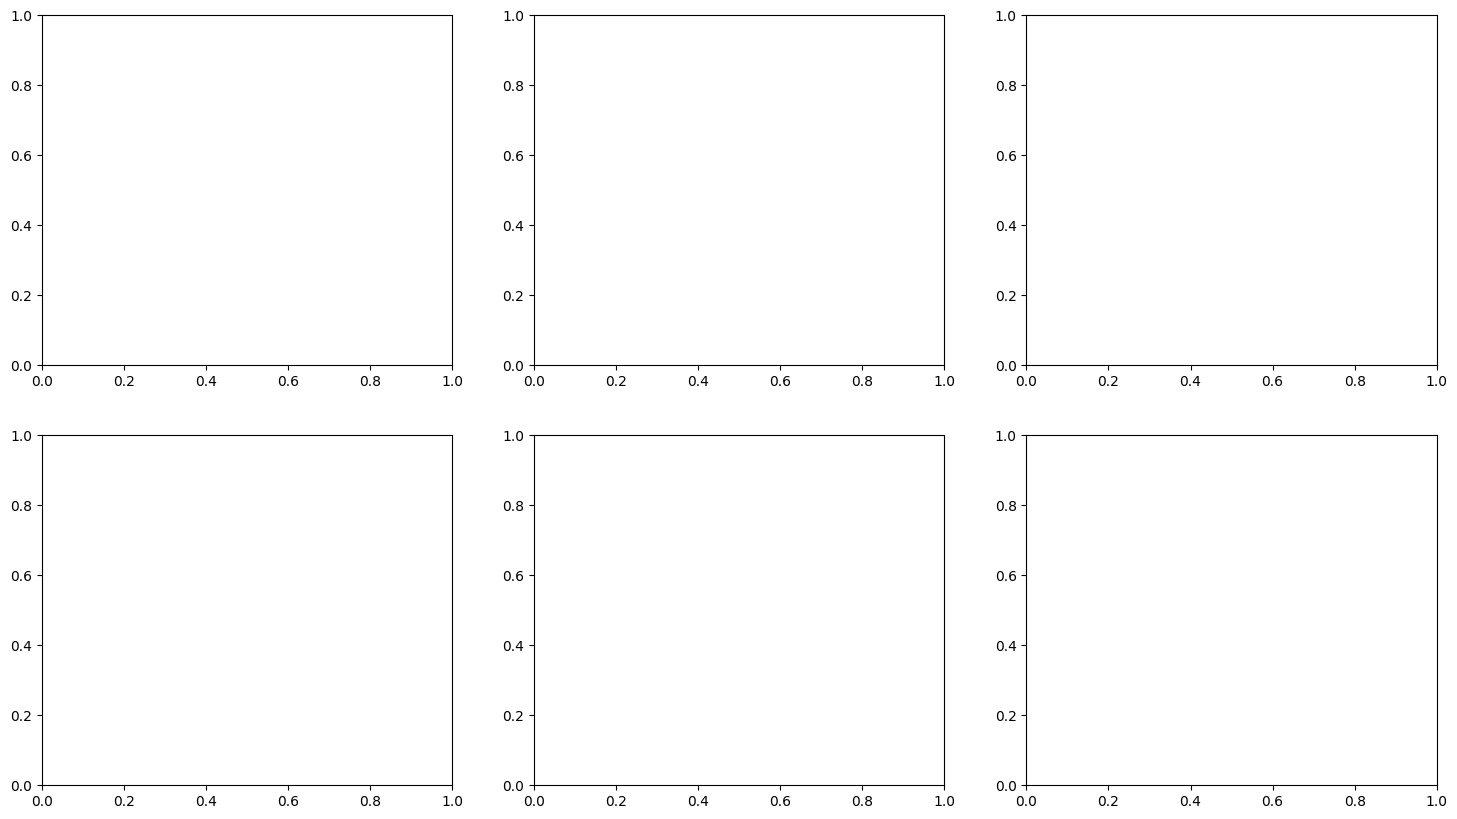

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from norm import RidgeSGDKernelTorchDict

# Função para aplicar o modelo e obter previsões e resíduos
def apply_model_and_plot(X_residual, y_residual):
    # Converter os dados em dicionários para serem compatíveis com o modelo
    X_residual_dict = {idx: x for idx, x in zip(y_residual.index, X_residual.values)}
    y_residual_dict = {idx: y for idx, y in zip(y_residual.index, y_residual.values)}

    # Instanciar o modelo com os parâmetros desejados
    ridge_sgd_torch = RidgeSGDKernelTorchDict(eta=0.68, c=1, sigma=0.9)

    # Lista para armazenar previsões
    y_pred = {}

    # Treinar e prever de forma online com os dados residuais
    for idx in X_residual_dict.keys():
        x_new = X_residual_dict[idx]
        y_new = y_residual_dict[idx]

        # Atualizar o modelo com o novo ponto
        ridge_sgd_torch.partial_fit(x_new, y_new, idx)

        # Fazer a previsão
        prediction = ridge_sgd_torch.predict(x_new)
        y_pred[idx] = prediction

    # Converter as previsões em um pandas.Series para facilitar o plot
    y_pred_series = pd.Series(y_pred).sort_index()
    y_residual_series = pd.Series(y_residual_dict).sort_index()

    return y_residual_series, y_pred_series

# Cidades e suas respectivas variáveis de X_residual e y_residual
cities = {
    'salvador': (X_residual_salvador, y_residual_salvador),
    'fortaleza': (X_residual_fortaleza, y_residual_fortaleza),
    'teresina': (X_residual_teresina, y_residual_teresina),
    'saoluis': (X_residual_saoluis, y_residual_saoluis),
    'joaopessoa': (X_residual_joaopessoa, y_residual_joaopessoa),
    'natal': (X_residual_natal, y_residual_natal)
}

# Dicionário para armazenar previsões para cada cidade
y_pred_all_cities = {}

# Configurar o layout para múltiplos gráficos
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # Criando um grid 2x3 para os gráficos

# Iterar sobre as cidades e gerar os gráficos
for i, (city_name, (X_residual, y_residual)) in enumerate(cities.items()):
    # Aplicar o modelo e obter os resíduos e previsões
    y_residual_series, y_pred_series = apply_model_and_plot(X_residual, y_residual)

    # Armazenar as previsões para a cidade
    y_pred_all_cities[city_name] = y_pred_series

    # Selecionar o eixo correto do gráfico
    ax = axes[i // 3, i % 3]  # Determinar a posição (2x3 grid)
    
    # Plotar os resultados
    ax.plot(y_residual_series, label='Resíduo Real', color='blue')
    ax.plot(y_pred_series, label='Resíduo Previsto', linestyle='--', color='orange')
    ax.set_title(f'Comparação Resíduos - {city_name}')
    ax.set_xlabel('Data')
    ax.set_ylabel('Resíduo')
    ax.legend()

# Ajustar o layout para que não sobreponha os gráficos
plt.tight_layout()
plt.show()

# Plote o previsto antes sempre 
# linha do target em preto e previsto em tracejado
# salvar os


In [ ]:
y_pred_salvador = y_pred_all_cities['salvador']
y_pred_fortaleza = y_pred_all_cities['fortaleza']
y_pred_joaopessoa = y_pred_all_cities['joaopessoa']
y_pred_natal = y_pred_all_cities['natal']
y_pred_saoluis = y_pred_all_cities['saoluis']
y_pred_teresina= y_pred_all_cities['teresina']


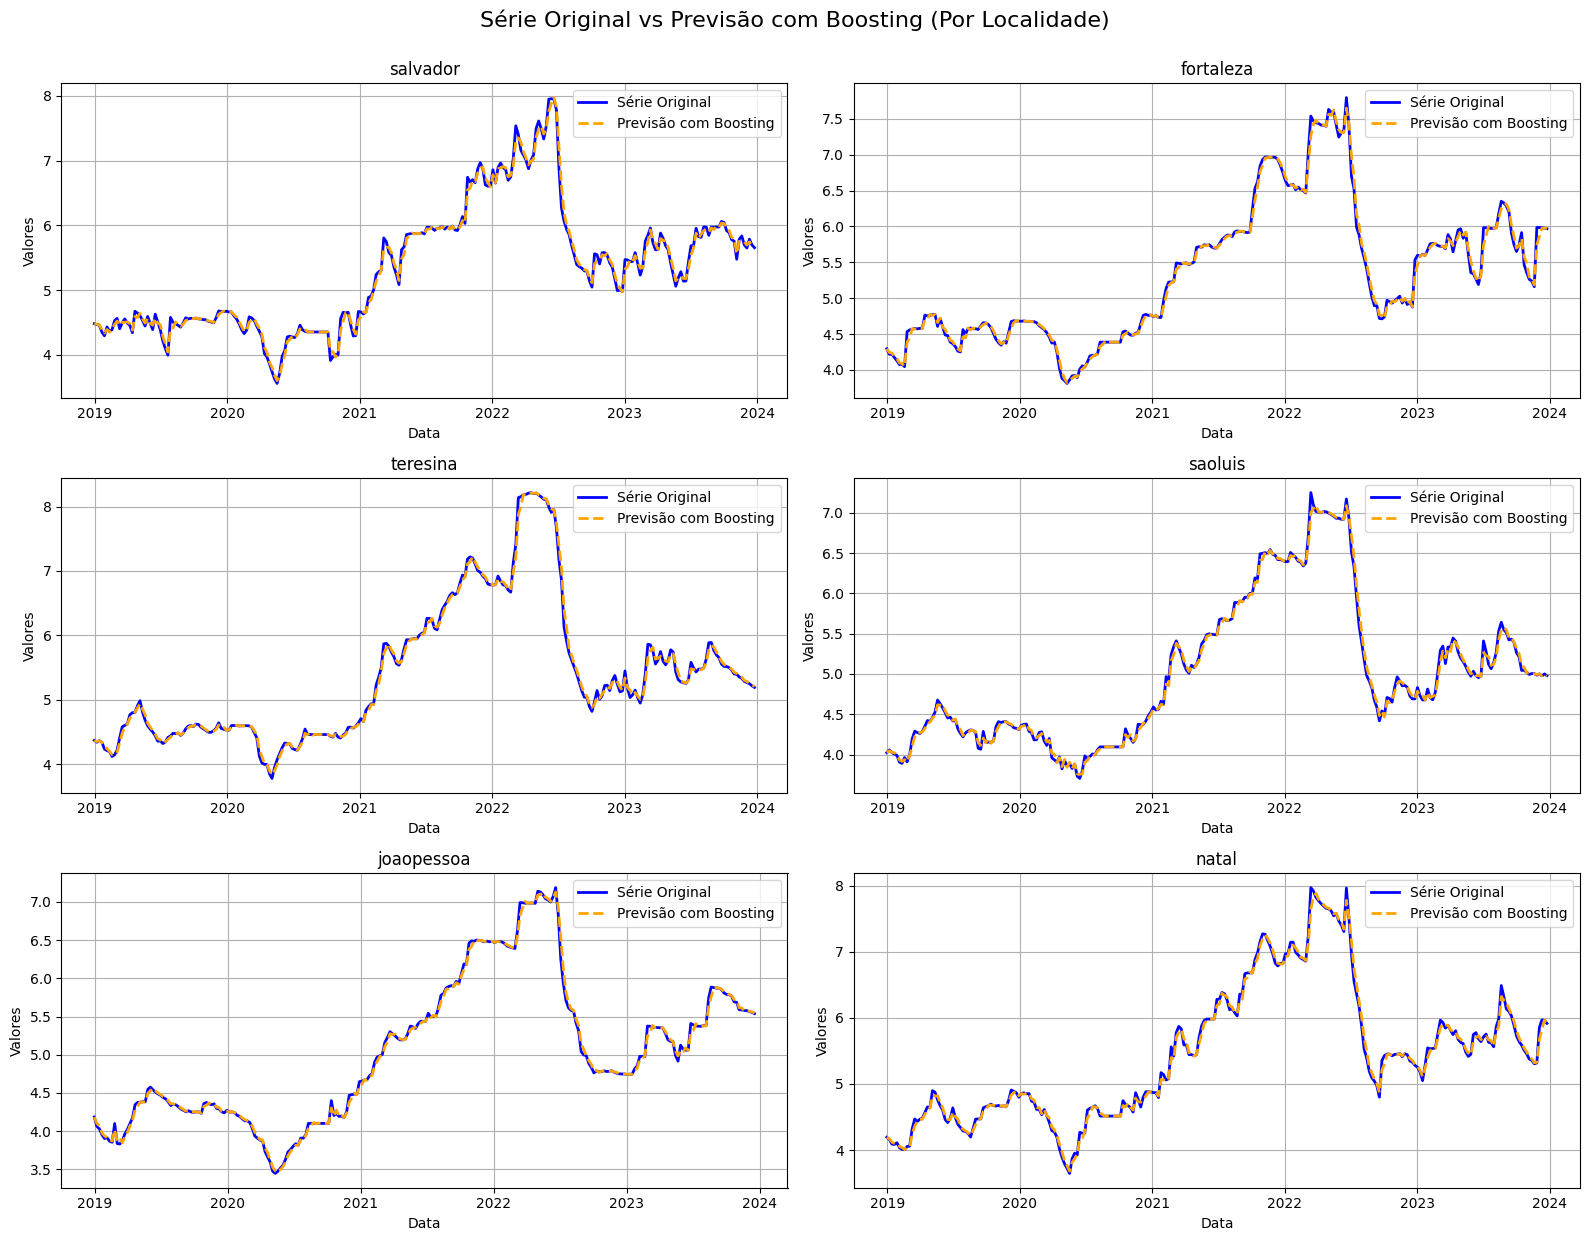

In [ ]:
import matplotlib.pyplot as plt

# Configuração para a visualização em grade: 3 linhas e 2 colunas
fig, axes = plt.subplots(3, 2, figsize=(16, 12))  # 3x2 layout
axes = axes.flatten()  # Achatar para facilitar a iteração

# Localidades e dados correspondentes
localidades = {
    'salvador': (y_salvador, y_forecast_salvador, y_pred_salvador),
    'fortaleza': (y_fortaleza, y_forecast_fortaleza, y_pred_fortaleza),
    'teresina': (y_teresina, y_forecast_teresina, y_pred_teresina),
    'saoluis': (y_saoluis, y_forecast_saoluis, y_pred_saoluis),
    'joaopessoa': (y_joaopessoa, y_forecast_joaopessoa, y_pred_joaopessoa),
    'natal': (y_natal, y_forecast_natal, y_pred_natal)
}

# Dicionário para armazenar as previsões ajustadas (boosted) para cada localidade
y_boosted_forecast_all = {}

# Iterar sobre cada localidade para criar os gráficos
for ax, (localidade, (y_true, y_forecast, y_pred_series)) in zip(axes, localidades.items()):
    # Calcular a previsão ajustada com boosting
    y_boosted_forecast = y_forecast + y_pred_series

    # Armazenar as previsões ajustadas no dicionário
    y_boosted_forecast_all[localidade] = y_boosted_forecast

    # Plot da série original
    ax.plot(y_true.index, y_true, label='Série Original', color='blue', linewidth=2)

    # Plot da previsão ajustada com boosting
    ax.plot(y_pred_series.index, y_boosted_forecast, label='Previsão com Boosting', color='orange', linestyle='--', linewidth=2)

    # Configurações do gráfico
    ax.set_title(localidade)
    ax.set_xlabel('Data')
    ax.set_ylabel('Valores')
    ax.legend()
    ax.grid(True)

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.suptitle('Série Original vs Previsão com Boosting (Por Localidade)', y=1.03, fontsize=16)
plt.show()

#incluir tambem previsao do random walk



In [ ]:
y_boosted_forecast_fortaleza = y_boosted_forecast_all['fortaleza']
y_boosted_forecast_natal = y_boosted_forecast_all['natal']
y_boosted_forecast_joaopessoa = y_boosted_forecast_all['joaopessoa']
y_boosted_forecast_salvador = y_boosted_forecast_all['salvador']
y_boosted_forecast_saoluis = y_boosted_forecast_all['saoluis']
y_boosted_forecast_teresina = y_boosted_forecast_all['teresina']

In [ ]:
# Aplicando a função para diferentes localidades
computeAccuracyModels('NORMA-DICT', 'Teresina', y_boosted_forecast_teresina, y_teresina)
computeAccuracyModels('NORMA-DICT', 'Salvador', y_boosted_forecast_salvador, y_salvador)
computeAccuracyModels('NORMA-DICT', 'São Luís', y_boosted_forecast_saoluis, y_saoluis)
computeAccuracyModels('NORMA-DICT', 'João Pessoa', y_boosted_forecast_joaopessoa, y_joaopessoa)
computeAccuracyModels('NORMA-DICT', 'Fortaleza', y_boosted_forecast_fortaleza, y_fortaleza)
computeAccuracyModels('NORMA-DICT', 'Natal', y_boosted_forecast_natal, y_natal)

# Exibindo o DataFrame consolidado
display(df_metrics)

# adicionar coluna de modelo

,Localidade,R2_Random Walk,Theil_Random Walk,R2_NORMA-DICT,Theil_NORMA-DICT
0,Teresina,0.985459,1.0,0.997091,0.200067
1,Salvador,0.968224,1.0,0.994784,0.164145
2,São Luís,0.983725,1.0,0.997097,0.178395
3,João Pessoa,0.989240,1.0,0.997988,0.187010
4,Fortaleza,0.975590,1.0,0.995987,0.164389
5,Natal,0.977150,1.0,0.996303,0.161777


## Models NORMA with Bayes Search

In [ ]:
from ridge_sgd_kernel import RidgeSGDKernelTorch
from skopt import BayesSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np

class RidgeSGDKernelTorchWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, eta=0.01, c=0.01, sigma=1.0):
        self.eta = eta
        self.c = c
        self.sigma = sigma
        self.model = None

    def fit(self, X, y):
        # Inicializar o modelo
        self.model = RidgeSGDKernelTorch(eta=self.eta, c=self.c, sigma=self.sigma)
        # Treinar online
        for x_new, y_new in zip(X, y):
            self.model.partial_fit(x_new, y_new)
        return self

    def predict(self, X):
        # Realizar previsões
        return np.array([self.model.predict(x) for x in X])


Melhores parâmetros para salvador:
  eta: 0.01
  c: 0.020559688754636634
  sigma: 0.5

Valores previstos para salvador:
Data da Coleta
2018-12-31    0.000000
2019-01-07    0.000000
2019-01-14   -0.000127
2019-01-21   -0.000241
2019-01-28   -0.001285
dtype: float64
Melhores parâmetros para fortaleza:
  eta: 0.01
  c: 0.015372773955126632
  sigma: 0.5

Valores previstos para fortaleza:
Data da Coleta
2018-12-31    0.000000
2019-01-07    0.000000
2019-01-14   -0.000759
2019-01-21   -0.000751
2019-01-28   -0.001190
dtype: float64
Melhores parâmetros para teresina:
  eta: 0.01
  c: 0.01
  sigma: 0.5017141101216936

Valores previstos para teresina:
Data da Coleta
2018-12-31    0.000000
2019-01-07    0.000000
2019-01-14   -0.000286
2019-01-21   -0.000047
2019-01-28   -0.000281
dtype: float64
Melhores parâmetros para saoluis:
  eta: 0.01
  c: 0.09016383103399707
  sigma: 0.6000860741705061

Valores previstos para saoluis:
Data da Coleta
2018-12-31    0.000000
2019-01-07    0.000000
2019-01-14 

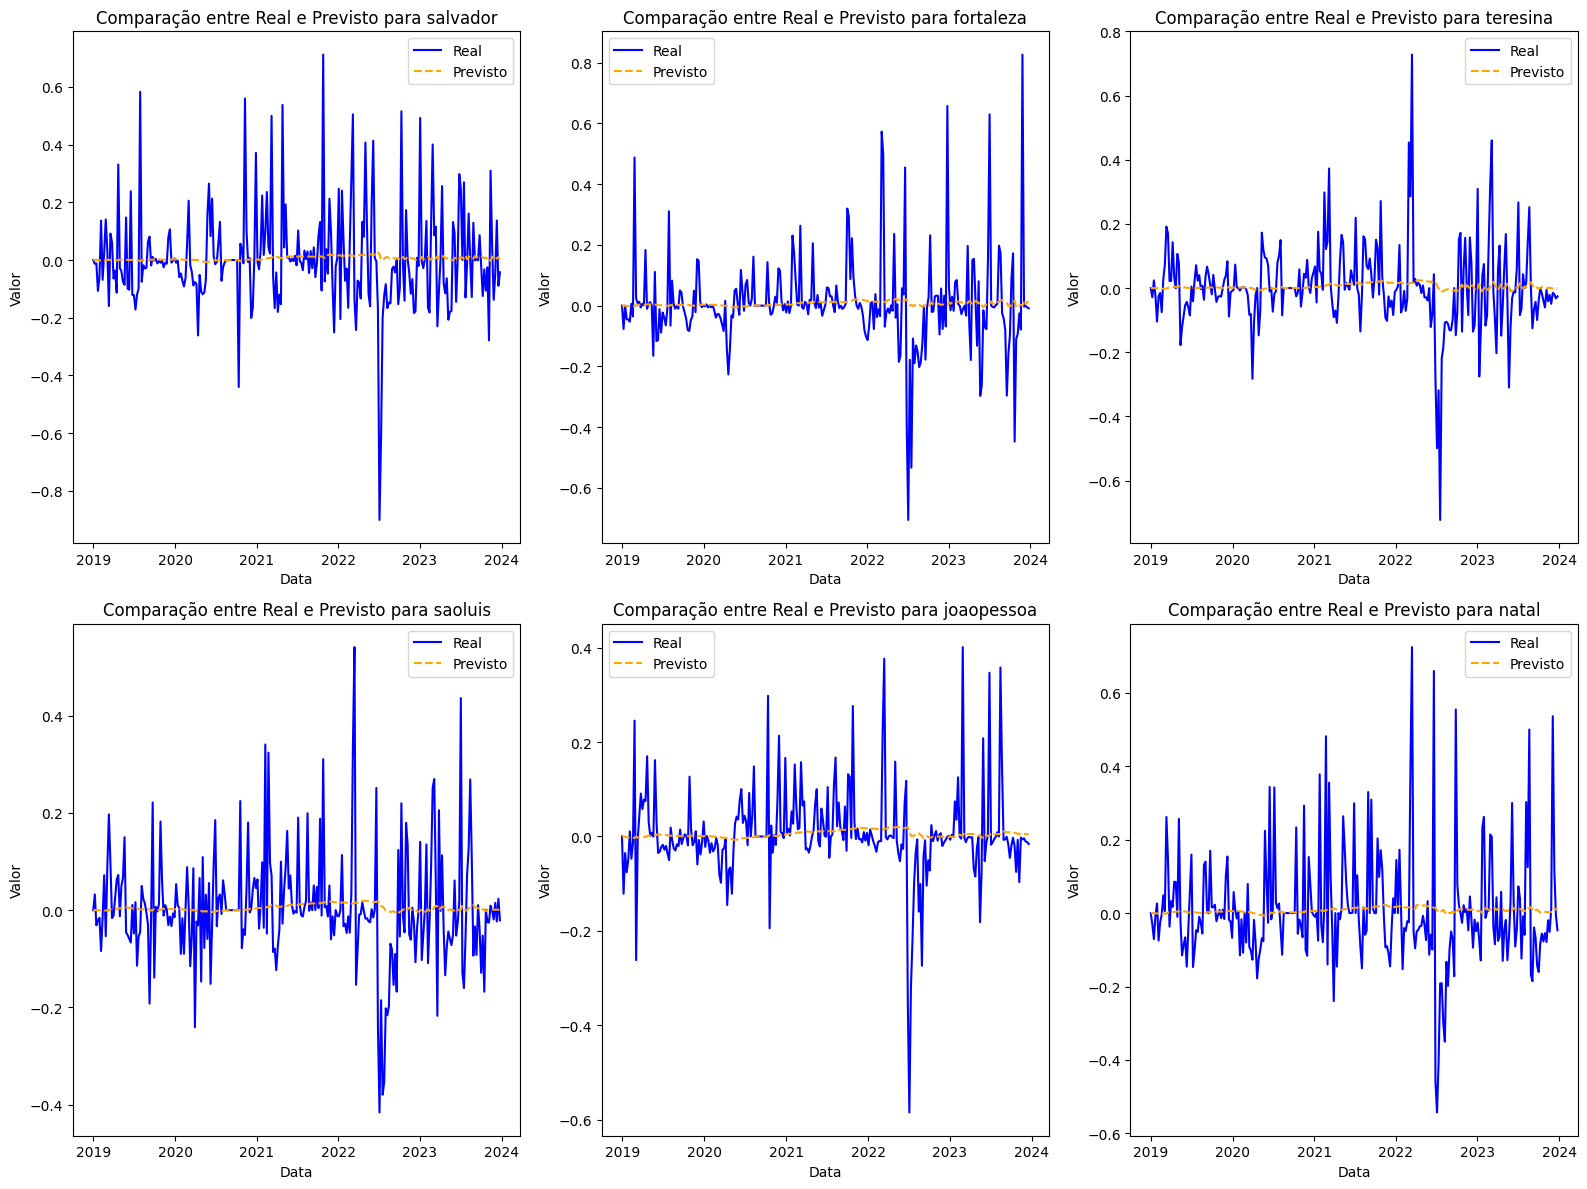

""


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.base import BaseEstimator, RegressorMixin
from ridge_sgd_kernel import RidgeSGDKernelTorch
from sklearn.metrics import r2_score, mean_squared_error

# Definir o espaço de busca dos hiperparâmetros
param_grid = {
    'eta': (0.01, 0.80, 'log-uniform'),
    'c': (0.01, 0.65, 'log-uniform'),
    'sigma': (0.5, 1.0, 'uniform')
}

# Função para aplicar a busca Bayesiana para cada cidade
def apply_bayes_search_for_city(city, X, y):
    # Criar o modelo de busca Bayesiana
    bayes_search = BayesSearchCV(
        RidgeSGDKernelTorchWrapper(),
        search_spaces=param_grid,
        n_iter=30,  # Número de iterações da busca bayesiana
        cv=TimeSeriesSplit(n_splits=3),  # Validação cruzada para séries temporais
        scoring='neg_mean_squared_error',  # Função de perda (erro quadrático médio)
        n_jobs=-1
    )

    # Realizar a busca
    bayes_search.fit(X.values, y.values)

    # Obter os melhores parâmetros da busca
    best_eta = bayes_search.best_params_['eta']
    best_c = bayes_search.best_params_['c']
    best_sigma = bayes_search.best_params_['sigma']

    # Exibir os melhores parâmetros encontrados para a cidade
    print(f"Melhores parâmetros para {city}:")
    print(f"  eta: {best_eta}")
    print(f"  c: {best_c}")
    print(f"  sigma: {best_sigma}\n")

    # Criar e treinar o modelo com os melhores parâmetros encontrados
    ridge_sgd_torch_best = RidgeSGDKernelTorch(eta=best_eta, c=best_c, sigma=best_sigma)

    # Lista para armazenar previsões
    y_pred_best = []

    # Treinar e prever de forma online com os dados
    for x_new, y_new in zip(X.values, y.values):
        ridge_sgd_torch_best.partial_fit(x_new, y_new)  # Atualiza o modelo com o novo ponto
        prediction = ridge_sgd_torch_best.predict(x_new)  # Faz a previsão imediatamente após o ajuste
        y_pred_best.append(prediction)

    # Previsões indexadas para facilitar o plot
    y_pred_bayes_indexed = pd.Series(y_pred_best, index=y.index)

    # Exibir os valores das previsões para a cidade
    print(f"Valores previstos para {city}:")
    print(y_pred_bayes_indexed.head())  # Exibe as primeiras 5 previsões

    return y_pred_bayes_indexed, bayes_search.best_params_

# Dicionário com os dados das cidades
cities = {
    'salvador': (X_residual_salvador, y_residual_salvador),
    'fortaleza': (X_residual_fortaleza, y_residual_fortaleza),
    'teresina': (X_residual_teresina, y_residual_teresina),
    'saoluis': (X_residual_saoluis, y_residual_saoluis),
    'joaopessoa': (X_residual_joaopessoa, y_residual_joaopessoa),
    'natal': (X_residual_natal, y_residual_natal)
}

# Dicionário para armazenar as previsões de cada cidade
predictions = {}

# Criar a grade para os gráficos
n_cities = len(cities)
n_cols = 3  # 3 colunas de gráficos
n_rows = (n_cities + n_cols - 1) // n_cols  # Calcular o número de linhas necessárias

# Criar um objeto de figura para os gráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6 * n_rows))

# Flatten os eixos para facilitar o acesso
axes = axes.flatten()

# Lista para armazenar os resultados
metrics_data = pd.DataFrame()

# Aplicar o BayesSearchCV para cada cidade e armazenar as previsões e métricas
for i, (city, (X, y)) in enumerate(cities.items()):
    # Chama a função para cada cidade
    y_pred, best_params = apply_bayes_search_for_city(city, X, y)
    
    # Armazenar as previsões no dicionário predictions
    predictions[city] = y_pred
    
    # Plotar a comparação entre real e previsto
    ax = axes[i]
    ax.plot(y, label='Real', color='blue')
    ax.plot(y_pred, label='Previsto', linestyle='--', color='orange')
    ax.set_title(f'Comparação entre Real e Previsto para {city}')
    ax.set_xlabel('Data')
    ax.set_ylabel('Valor')
    ax.legend()

# Remover os eixos não utilizados, se houver
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()

# Exibir o DataFrame consolidado com métricas
display(metrics_data)


# AO inves da palavea previsto usar  o nome do modelo

In [ ]:
y_predic_salvador = predictions['salvador']
y_predic_natal = predictions['natal']
y_predic_fortaleza = predictions['fortaleza']
y_predic_teresina = predictions['teresina']
y_predic_saoluis = predictions['saoluis']
y_predic_joaopessoa = predictions['joaopessoa']
        

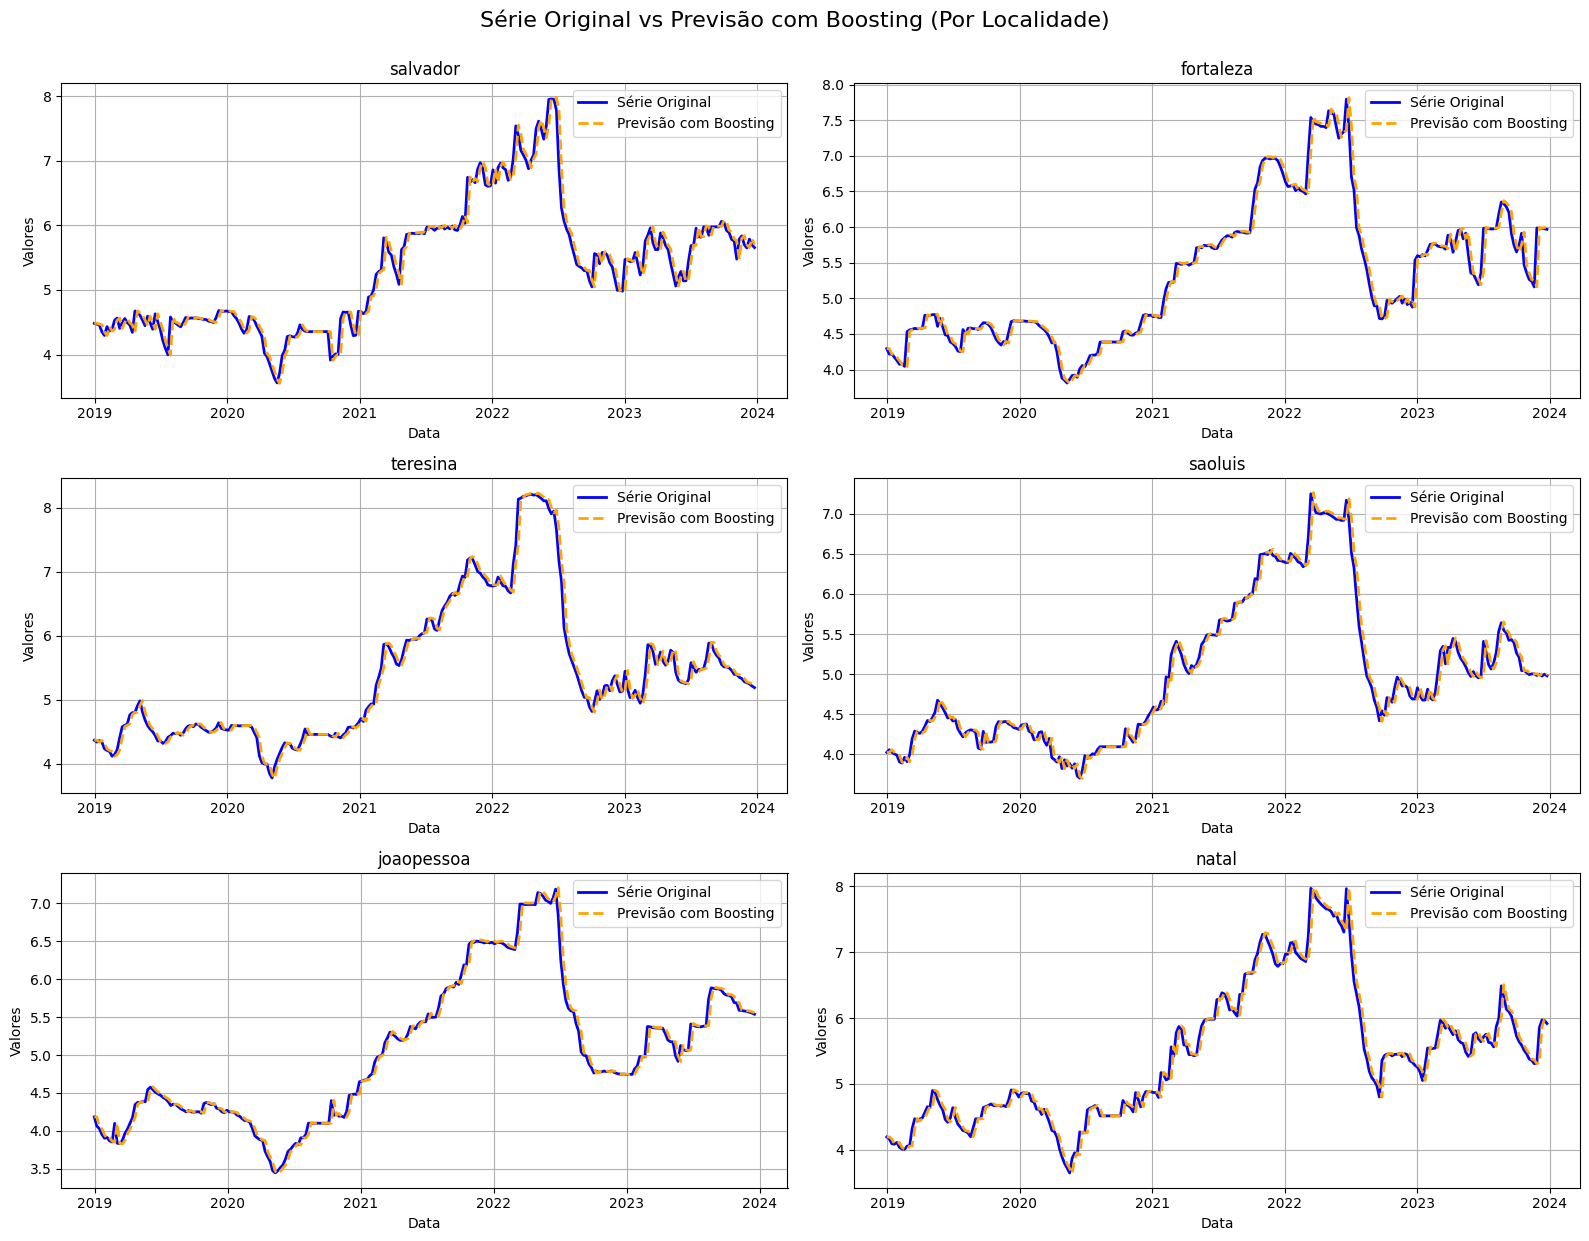

In [ ]:
import matplotlib.pyplot as plt

# Configuração para a visualização em grade: 3 linhas e 2 colunas
fig, axes = plt.subplots(3, 2, figsize=(16, 12))  # 3x2 layout
axes = axes.flatten()  # Achatar para facilitar a iteração

# Localidades e dados correspondentes
localidades = {
    'salvador': (y_salvador, y_forecast_salvador, y_predic_salvador),
    'fortaleza': (y_fortaleza, y_forecast_fortaleza, y_predic_fortaleza),
    'teresina': (y_teresina, y_forecast_teresina, y_predic_teresina),
    'saoluis': (y_saoluis, y_forecast_saoluis, y_predic_saoluis),
    'joaopessoa': (y_joaopessoa, y_forecast_joaopessoa, y_predic_joaopessoa),
    'natal': (y_natal, y_forecast_natal, y_predic_natal)
}

# Dicionário para armazenar as previsões ajustadas (boosted) para cada localidade
y_boosted_forecast_bayes = {}

# Iterar sobre cada localidade para criar os gráficos
for ax, (localidade, (y_true, y_forecast, y_pred_series)) in zip(axes, localidades.items()):
    # Calcular a previsão ajustada com boosting
    y_boosted_forecast = y_forecast + y_pred_series

    # Armazenar as previsões ajustadas no dicionário
    y_boosted_forecast_bayes[localidade] = y_boosted_forecast

    # Plot da série original
    ax.plot(y_true.index, y_true, label='Série Original', color='blue', linewidth=2)

    # Plot da previsão ajustada com boosting
    ax.plot(y_pred_series.index, y_boosted_forecast, label='Previsão com Boosting', color='orange', linestyle='--', linewidth=2)

    # Configurações do gráfico
    ax.set_title(localidade)
    ax.set_xlabel('Data')
    ax.set_ylabel('Valores')
    ax.legend()
    ax.grid(True)

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.suptitle('Série Original vs Previsão com Boosting (Por Localidade)', y=1.03, fontsize=16)
plt.show()




In [ ]:
y_boosted_forecast_fortaleza_bayes = y_boosted_forecast_bayes['fortaleza']
y_boosted_forecast_natal_bayes = y_boosted_forecast_bayes['natal']
y_boosted_forecast_joaopessoa_bayes = y_boosted_forecast_bayes['joaopessoa']
y_boosted_forecast_salvador_bayes = y_boosted_forecast_bayes['salvador']
y_boosted_forecast_saoluis_bayes = y_boosted_forecast_bayes['saoluis']
y_boosted_forecast_teresina_bayes = y_boosted_forecast_bayes['teresina']


In [ ]:

# Aplicando a função para diferentes localidades
computeAccuracyModels('NORMA-bayes', 'Teresina', y_boosted_forecast_teresina_bayes, y_teresina)
computeAccuracyModels('NORMA-bayes', 'Salvador', y_boosted_forecast_salvador_bayes, y_salvador)
computeAccuracyModels('NORMA-bayes', 'São Luís', y_boosted_forecast_saoluis_bayes, y_saoluis)
computeAccuracyModels('NORMA-bayes', 'João Pessoa', y_boosted_forecast_joaopessoa_bayes, y_joaopessoa)
computeAccuracyModels('NORMA-bayes', 'Fortaleza', y_boosted_forecast_fortaleza_bayes, y_fortaleza)
computeAccuracyModels('NORMA-bayes', 'Natal', y_boosted_forecast_natal_bayes, y_natal)

# Exibindo o DataFrame consolidado
display(df_metrics)

,Localidade,R2_Random Walk,Theil_Random Walk,R2_NORMA-DICT,Theil_NORMA-DICT,R2_NORMA-bayes,Theil_NORMA-bayes
0,Teresina,0.985459,1.0,0.997091,0.200067,0.985637,0.987781
1,Salvador,0.968224,1.0,0.994784,0.164145,0.968094,1.004101
2,São Luís,0.983725,1.0,0.997097,0.178395,0.983740,0.999028
3,João Pessoa,0.989240,1.0,0.997988,0.187010,0.989292,0.995148
4,Fortaleza,0.975590,1.0,0.995987,0.164389,0.975641,0.997933
5,Natal,0.977150,1.0,0.996303,0.161777,0.977194,0.998093


In [ ]:
X_residual_natal= X_residual_natal.drop(columns='Lag_2')
X_residual_fortaleza = X_residual_fortaleza.drop(columns='Lag_2')
X_residual_joaopessoa = X_residual_joaopessoa.drop(columns='Lag_2')
X_residual_teresina = X_residual_teresina.drop(columns='Lag_2')
X_residual_saoluis = X_residual_saoluis.drop(columns='Lag_2')
X_residual_salvador = X_residual_salvador.drop(columns='Lag_2')

## Arima 

C:\Users\kaio\AppData\Local\Temp\ipykernel_1904\117346731.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prediction = model.predict(n_periods=1)[0]  # Prever um período
C:\Users\kaio\AppData\Local\Temp\ipykernel_1904\117346731.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prediction = model.predict(n_periods=1)[0]  # Prever um período
C:\Users\kaio\AppData\Local\Temp\ipykernel_1904\117346731.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positio

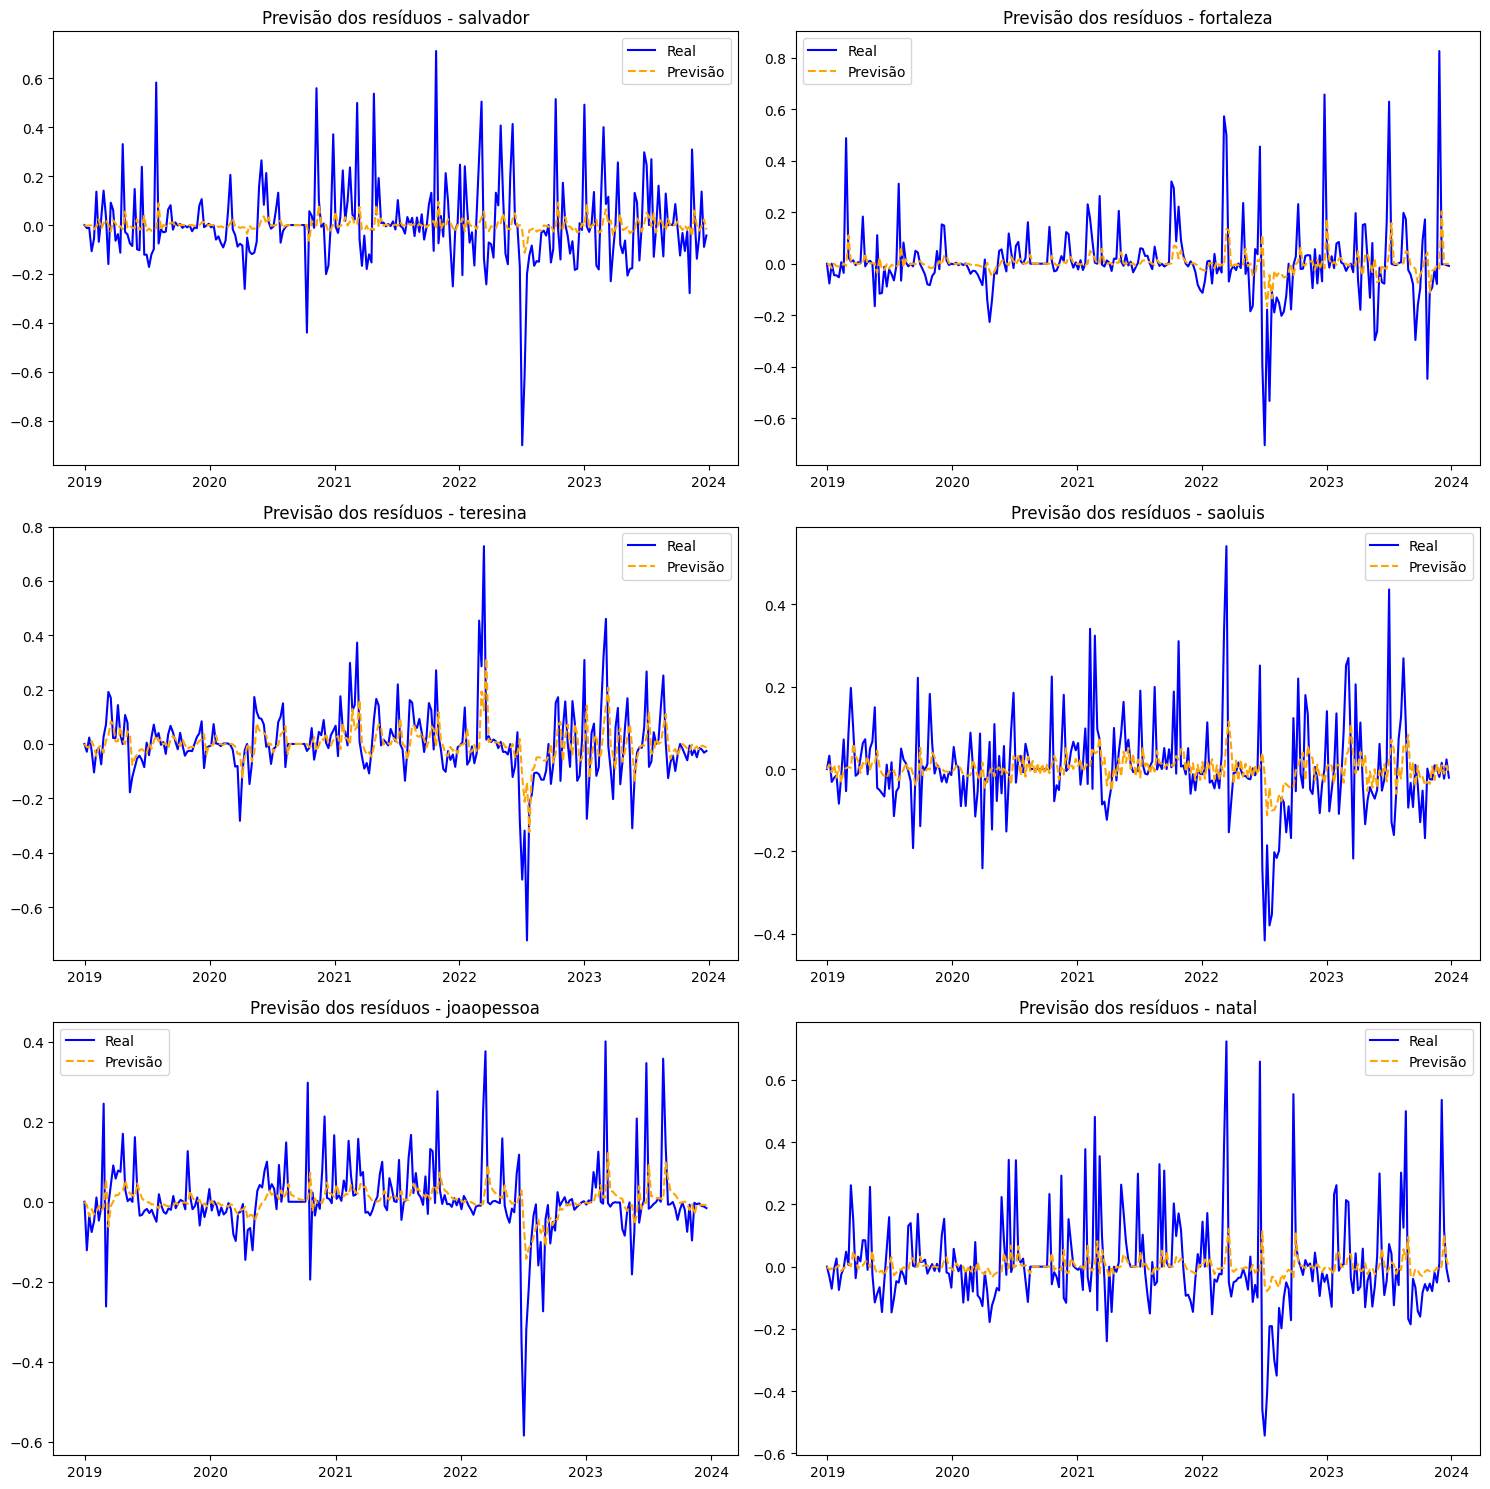

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pmdarima as pm

# Dados simulados (substitua pelas suas cidades reais)
cities = {
    'salvador': (X_residual_salvador, y_residual_salvador),
    'fortaleza': (X_residual_fortaleza, y_residual_fortaleza),
    'teresina': (X_residual_teresina, y_residual_teresina),
    'saoluis': (X_residual_saoluis, y_residual_saoluis),
    'joaopessoa': (X_residual_joaopessoa, y_residual_joaopessoa),
    'natal': (X_residual_natal, y_residual_natal)
}

predictions = {}

# Iterar sobre as cidades
for city, (X_residual, y_residual) in cities.items():
    # Inicializar o modelo AutoARIMA
    model = pm.auto_arima(
        y_residual,  # Série residual para inicializar o modelo
        seasonal=False,
        stepwise=True,
        suppress_warnings=True,
        error_action='ignore',
        trace=False
    )

    predictions_online = []  # Lista para armazenar previsões

    # Previsão online ponto a ponto
    for t in range(len(y_residual)):
        if t == 0:
            # Primeira previsão é o valor real
            predictions_online.append(y_residual.iloc[t])
        else:
            prediction = model.predict(n_periods=1)[0]  # Prever um período
            predictions_online.append(prediction)
            model.update(y_residual.iloc[t])  # Atualizar com valor real pela posição

    # Armazenar previsões
    predictions[city] = pd.Series(predictions_online, index=y_residual.index)

# Configurar os subplots em grade
num_cities = len(cities)
cols = 2  # Número de colunas na grade
rows = (num_cities + cols - 1) // cols  # Número de linhas necessárias

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), sharex=False, sharey=False)

# Iterar sobre as cidades e plotar os gráficos
for i, (city, preds) in enumerate(predictions.items()):
    row, col = divmod(i, cols)
    ax = axes[row, col] if rows > 1 else axes[col]  # Selecionar o eixo correto
    ax.plot(cities[city][1], label='Real', color='blue')
    ax.plot(preds, label='Previsão', linestyle='--', color='orange')
    ax.set_title(f'Previsão dos resíduos - {city}')
    ax.legend()

# Remover subplots vazios (se houver)
if num_cities < rows * cols:
    for i in range(num_cities, rows * cols):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


In [ ]:
y_predic_salvador_arima = predictions['salvador']
y_predic_natal_arima = predictions['natal']
y_predic_fortaleza_arima = predictions['fortaleza']
y_predic_teresina_arima= predictions['teresina']
y_predic_saoluis_arima = predictions['saoluis']
y_predic_joaopessoa_arima = predictions['joaopessoa']
        

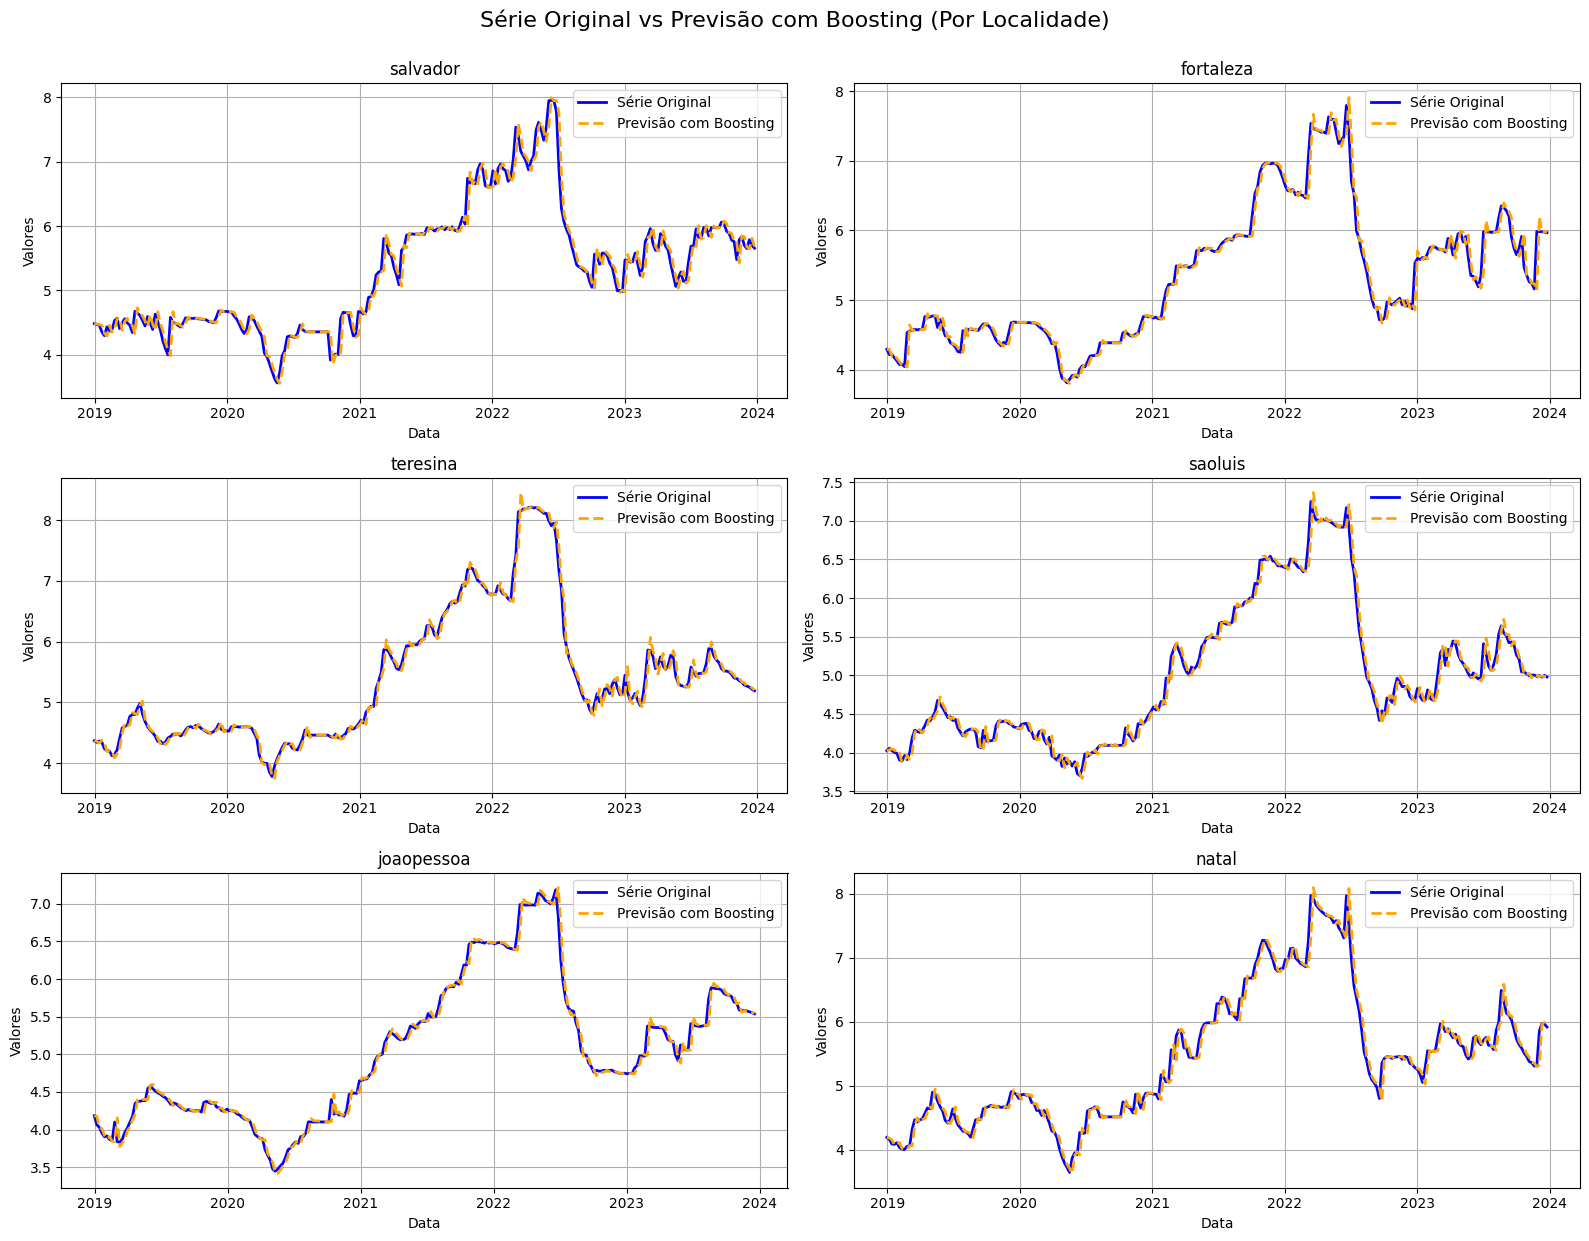

In [ ]:
import matplotlib.pyplot as plt

# Configuração para a visualização em grade: 3 linhas e 2 colunas
fig, axes = plt.subplots(3, 2, figsize=(16, 12))  # 3x2 layout
axes = axes.flatten()  # Achatar para facilitar a iteração

# Localidades e dados correspondentes
localidades = {
    'salvador': (y_salvador, y_forecast_salvador, y_predic_salvador_arima),
    'fortaleza': (y_fortaleza, y_forecast_fortaleza, y_predic_fortaleza_arima),
    'teresina': (y_teresina, y_forecast_teresina, y_predic_teresina_arima),
    'saoluis': (y_saoluis, y_forecast_saoluis, y_predic_saoluis_arima),
    'joaopessoa': (y_joaopessoa, y_forecast_joaopessoa, y_predic_joaopessoa_arima),
    'natal': (y_natal, y_forecast_natal, y_predic_natal_arima)
}

# Dicionário para armazenar as previsões ajustadas (boosted) para cada localidade
y_boosted_forecast_arima = {}

# Iterar sobre cada localidade para criar os gráficos
for ax, (localidade, (y_true, y_forecast, y_pred_series)) in zip(axes, localidades.items()):
    # Calcular a previsão ajustada com boosting
    y_boosted_forecast = y_forecast + y_pred_series

    # Armazenar as previsões ajustadas no dicionário
    y_boosted_forecast_arima[localidade] = y_boosted_forecast

    # Plot da série original
    ax.plot(y_true.index, y_true, label='Série Original', color='blue', linewidth=2)

    # Plot da previsão ajustada com boosting
    ax.plot(y_pred_series.index, y_boosted_forecast, label='Previsão com Boosting', color='orange', linestyle='--', linewidth=2)

    # Configurações do gráfico
    ax.set_title(localidade)
    ax.set_xlabel('Data')
    ax.set_ylabel('Valores')
    ax.legend()
    ax.grid(True)

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.suptitle('Série Original vs Previsão com Boosting (Por Localidade)', y=1.03, fontsize=16)
plt.show()




In [ ]:
y_boosted_forecast_fortaleza_arima = y_boosted_forecast_arima['fortaleza']
y_boosted_forecast_natal_arima = y_boosted_forecast_arima['natal']
y_boosted_forecast_joaopessoa_arima = y_boosted_forecast_arima['joaopessoa']
y_boosted_forecast_salvador_arima = y_boosted_forecast_arima['salvador']
y_boosted_forecast_saoluis_arima = y_boosted_forecast_arima['saoluis']
y_boosted_forecast_teresina_arima = y_boosted_forecast_arima['teresina']


In [ ]:

# Aplicando a função para diferentes localidades
computeAccuracyModels('ARIMA', 'Teresina', y_boosted_forecast_teresina_arima, y_teresina)
computeAccuracyModels('ARIMA', 'Salvador', y_boosted_forecast_salvador_arima, y_salvador)
computeAccuracyModels('ARIMA', 'São Luís', y_boosted_forecast_saoluis_arima, y_saoluis)
computeAccuracyModels('ARIMA', 'João Pessoa', y_boosted_forecast_joaopessoa_arima, y_joaopessoa)
computeAccuracyModels('ARIMA', 'Fortaleza', y_boosted_forecast_fortaleza_arima, y_fortaleza)
computeAccuracyModels('ARIMA', 'Natal', y_boosted_forecast_natal_arima, y_natal)

# Exibindo o DataFrame consolidado
display(df_metrics)

,Localidade,R2_Random Walk,Theil_Random Walk,R2_NORMA-DICT,Theil_NORMA-DICT,R2_NORMA-bayes,Theil_NORMA-bayes,R2_ARIMA,Theil_ARIMA
0,Teresina,0.985459,1.0,0.997091,0.200067,0.985637,0.987781,0.988149,0.815032
1,Salvador,0.968224,1.0,0.994784,0.164145,0.968094,1.004101,0.968913,0.978310
2,São Luís,0.983725,1.0,0.997097,0.178395,0.983740,0.999028,0.984854,0.930608
3,João Pessoa,0.989240,1.0,0.997988,0.187010,0.989292,0.995148,0.990314,0.900196
4,Fortaleza,0.975590,1.0,0.995987,0.164389,0.975641,0.997933,0.976752,0.952430
5,Natal,0.977150,1.0,0.996303,0.161777,0.977194,0.998093,0.977819,0.970735


## Arima River

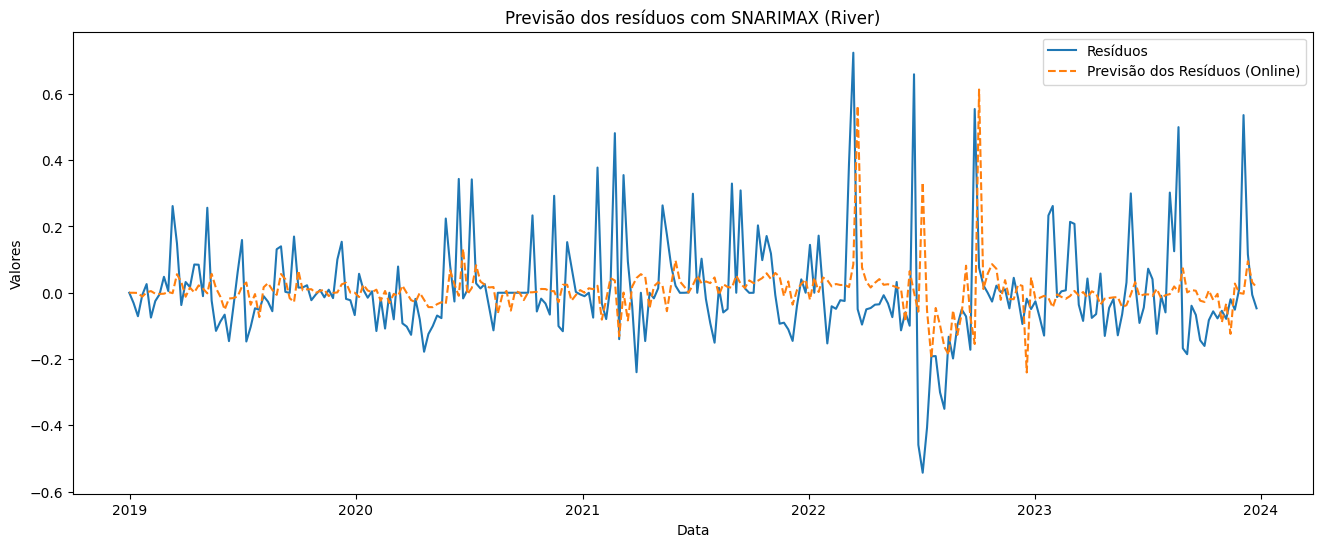

In [ ]:
from river.time_series import SNARIMAX
import pandas as pd
import matplotlib.pyplot as plt

# Inicializar o modelo SNARIMAX
model = SNARIMAX(
    p=1, d=0, q=1, 
    m=12,  # Ajuste a sazonalidade conforme necessário (ex.: 12 para sazonalidade anual em dados mensais)
    sp=1, sd=0, sq=1
)

# Lista para armazenar as previsões iterativas
predictions_online = []

# Prever um ponto de cada vez e atualizar o modelo
for i in range(len(y_residual)):
    # Obter o valor real atual
    real_value = y_residual.iloc[i]
    
    # Fazer a previsão com o modelo (horizon=1 para prever um ponto)
    prediction = model.forecast(horizon=1)
    
    # Armazenar a previsão
    predictions_online.append(prediction[0])  # Como forecast retorna uma lista, pegamos o primeiro valor
    
    # Atualizar o modelo com a observação real
    model.learn_one(real_value)

# Convertendo as previsões para uma série
prediction_series_online = pd.Series(predictions_online, index=y_residual.index)

# Plotar os resultados
plt.figure(figsize=(16, 6))
plt.plot(y_residual.index, y_residual, label='Resíduos')
plt.plot(prediction_series_online.index, prediction_series_online, label='Previsão dos Resíduos (Online)', linestyle='--')
plt.title('Previsão dos resíduos com SNARIMAX (River)')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.legend()
plt.show()




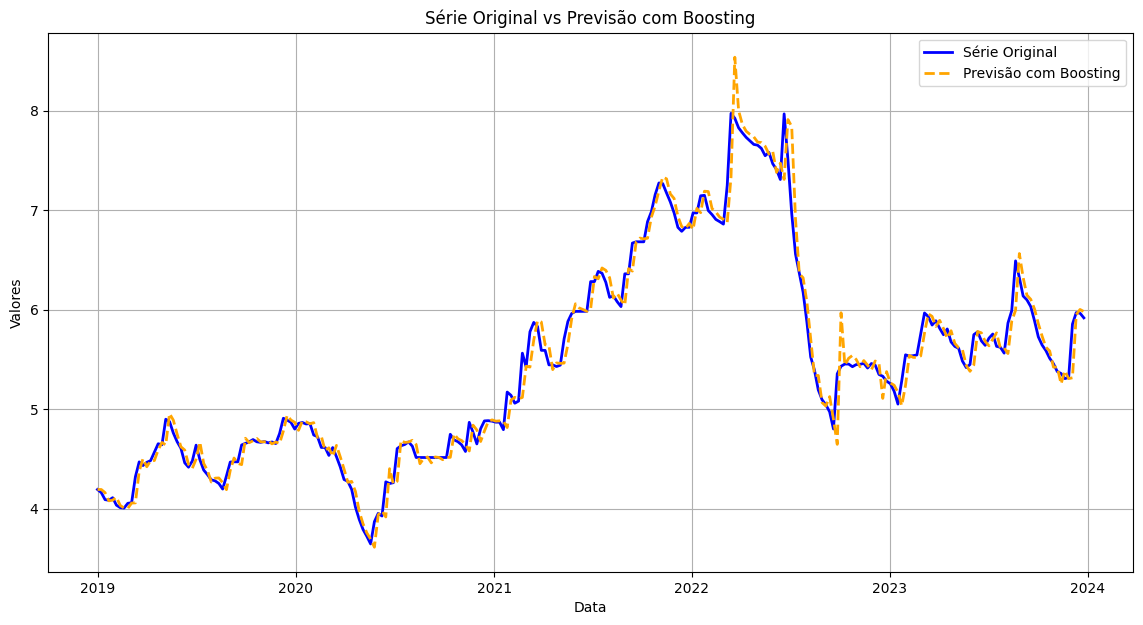

In [ ]:

# Supondo que `y_original` seja sua série original para comparar com a previsão ajustada
# Combine as previsões
y_boosted_forecast_arima = y_forecast + prediction_series_online

# Plotando a série original e a previsão ajustada com boosting
plt.figure(figsize=(14, 7))

# Plot da série original
plt.plot(y_true.index, y_true, label='Série Original', color='blue', linewidth=2)

# Plot da previsão com boosting
plt.plot(prediction_series_online.index, y_boosted_forecast_arima, label='Previsão com Boosting', color='orange', linestyle='--', linewidth=2)

# Configurações do gráfico
plt.xlabel('Data')
plt.ylabel('Valores')
plt.title('Série Original vs Previsão com Boosting')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
computeAccuracyModels(models='Boosting with Arima River', y_pred=y_boosted_forecast_arima,y_true=y_true)

TypeError: computeAccuracyModels() got an unexpected keyword argument 'models'

## Arima 

C:\Users\kaio\AppData\Local\Temp\ipykernel_1904\26576691.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prediction = model.predict(n_periods=1)[0]  # Prever um período


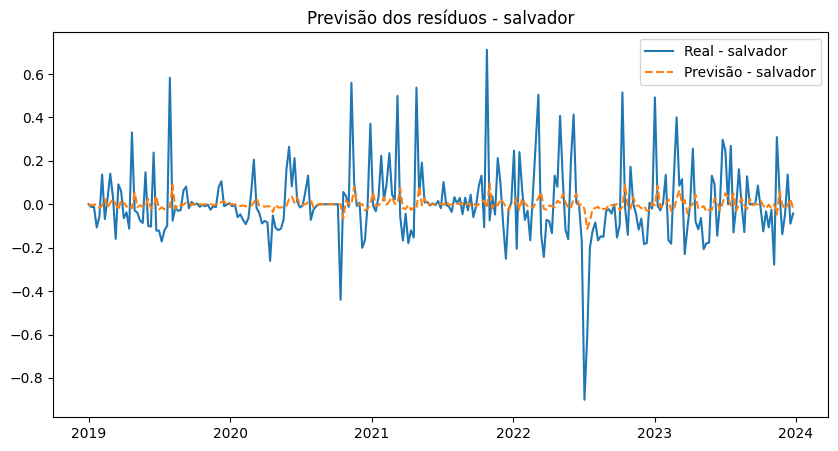

C:\Users\kaio\AppData\Local\Temp\ipykernel_1904\26576691.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prediction = model.predict(n_periods=1)[0]  # Prever um período


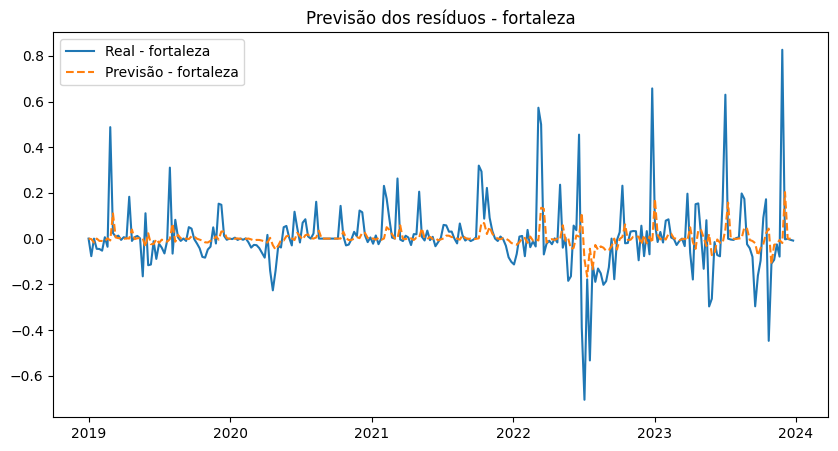

C:\Users\kaio\AppData\Local\Temp\ipykernel_1904\26576691.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prediction = model.predict(n_periods=1)[0]  # Prever um período


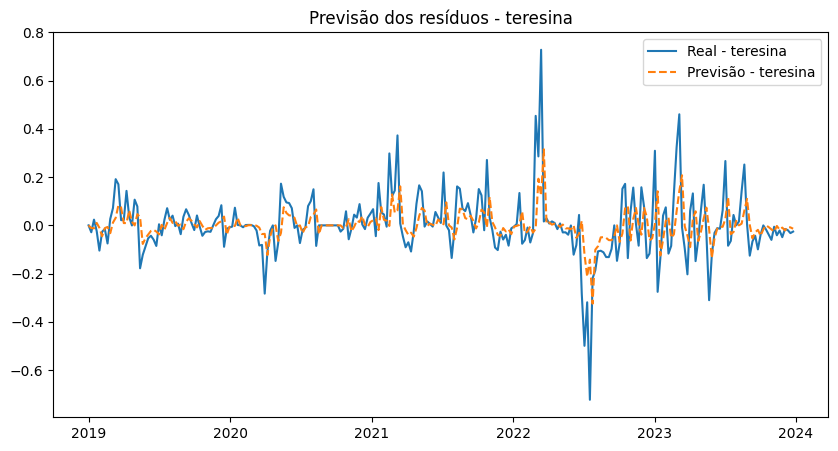

C:\Users\kaio\AppData\Local\Temp\ipykernel_1904\26576691.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prediction = model.predict(n_periods=1)[0]  # Prever um período


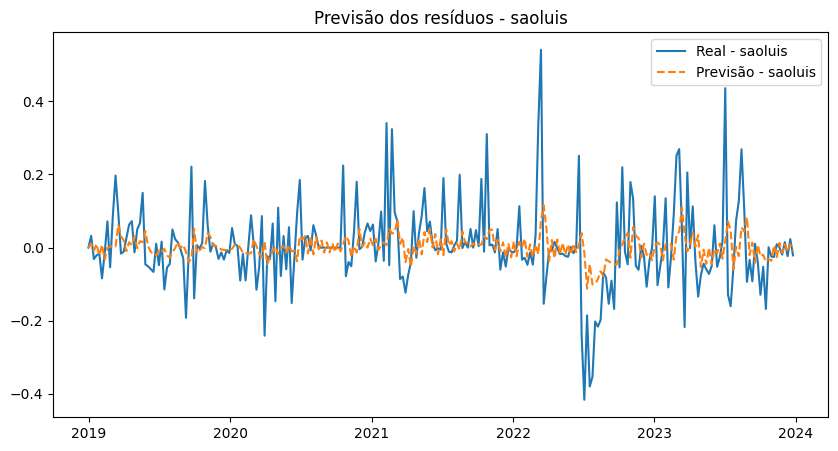

C:\Users\kaio\AppData\Local\Temp\ipykernel_1904\26576691.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prediction = model.predict(n_periods=1)[0]  # Prever um período


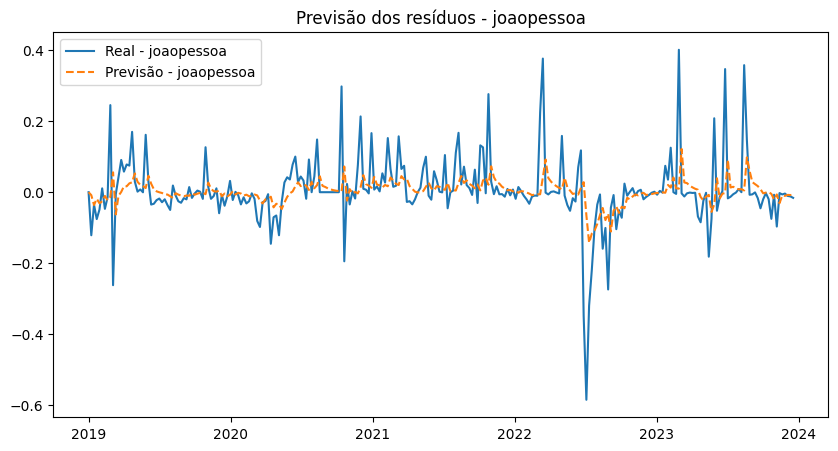

C:\Users\kaio\AppData\Local\Temp\ipykernel_1904\26576691.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prediction = model.predict(n_periods=1)[0]  # Prever um período


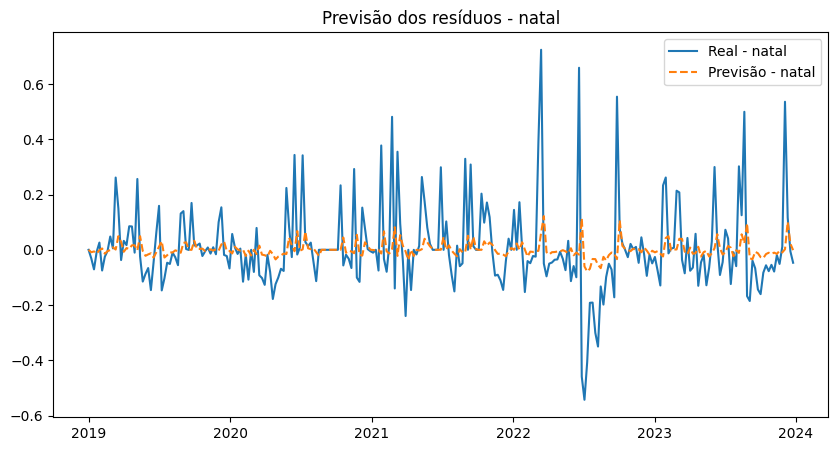

Previsões para salvador:
Data da Coleta
2018-12-31    0.000000
2019-01-07   -0.003968
2019-01-14   -0.001436
2019-01-21   -0.001679
2019-01-28   -0.017384
                ...   
2023-11-27   -0.001523
2023-12-04   -0.022630
2023-12-11   -0.004226
2023-12-18    0.023426
2023-12-25   -0.018586
Length: 261, dtype: float64

Previsões para fortaleza:
Data da Coleta
2018-12-31    0.000000
2019-01-07   -0.001955
2019-01-14   -0.017389
2019-01-21    0.000000
2019-01-28   -0.010133
                ...   
2023-11-27   -0.019446
2023-12-04    0.203480
2023-12-11   -0.000676
2023-12-18   -0.000253
2023-12-25   -0.001223
Length: 261, dtype: float64

Previsões para teresina:
Data da Coleta
2018-12-31    0.000000
2019-01-07   -0.011113
2019-01-14   -0.012356
2019-01-21    0.010262
2019-01-28   -0.010313
                ...   
2023-11-27   -0.009255
2023-12-04   -0.021121
2023-12-11   -0.006478
2023-12-18   -0.008392
2023-12-25   -0.013866
Length: 261, dtype: float64

Previsões para saoluis:
Data da C

In [ ]:
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt

# Defina suas cidades como antes
cities = {
    'salvador': (X_residual_salvador, y_residual_salvador),
    'fortaleza': (X_residual_fortaleza, y_residual_fortaleza),
    'teresina': (X_residual_teresina, y_residual_teresina),
    'saoluis': (X_residual_saoluis, y_residual_saoluis),
    'joaopessoa': (X_residual_joaopessoa, y_residual_joaopessoa),
    'natal': (X_residual_natal, y_residual_natal)
}

predictions = {}

# Iterar sobre as cidades
for city, (X_residual, y_residual) in cities.items():
    # Inicializar o modelo AutoARIMA
    model = pm.auto_arima(
        y_residual,  # Série residual para inicializar o modelo
        seasonal=False,
        stepwise=True,
        suppress_warnings=True,
        error_action='ignore',
        trace=False
    )

    predictions_online = []  # Lista para armazenar previsões

    # Previsão online ponto a ponto
    for t in range(len(y_residual)):
        if t == 0:
            # Primeira previsão é o valor real
            predictions_online.append(y_residual.iloc[t])
        else:
            prediction = model.predict(n_periods=1)[0]  # Prever um período
            predictions_online.append(prediction)
            model.update(y_residual.iloc[t])  # Atualizar com valor real pela posição

    # Armazenar previsões
    predictions[city] = pd.Series(predictions_online, index=y_residual.index)

    # Plotar os resultados
    plt.figure(figsize=(10, 5))
    plt.plot(y_residual, label=f'Real - {city}')
    plt.plot(predictions[city], label=f'Previsão - {city}', linestyle='--')
    plt.title(f'Previsão dos resíduos - {city}')
    plt.legend()
    plt.show()

# Exibir previsões
for city, preds in predictions.items():
    print(f'Previsões para {city}:\n{preds}\n')



In [ ]:


# Supondo que `y_original` seja sua série original para comparar com a previsão ajustada
# Combine as previsões
y_boosted_forecast_arima = y_forecast + prediction_series_online

# Plotando a série original e a previsão ajustada com boosting
plt.figure(figsize=(14, 7))

# Plot da série original
plt.plot(y_true.index, y_true, label='Série Original', color='blue', linewidth=2)

# Plot da previsão com boosting
plt.plot(prediction_series_online.index, y_boosted_forecast_arima, label='Previsão com Boosting', color='orange', linestyle='--', linewidth=2)

# Configurações do gráfico
plt.xlabel('Data')
plt.ylabel('Valores')
plt.title('Série Original vs Previsão com Boosting')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

computeAccuracyModels(models='Boosting with Arima', y_pred=y_boosted_forecast_arima,y_true=y_true)